<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B41_E22CSEU1213_Kanishka/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1**

In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [9]:
image_path = "/content/cv_image.jpg"

In [10]:
image = cv2.imread(image_path)

In [11]:
#Image Resizing
scale_factor = 0.5
new_width = int(image.shape[1]*scale_factor)
new_height= int(image.shape[0]*scale_factor)

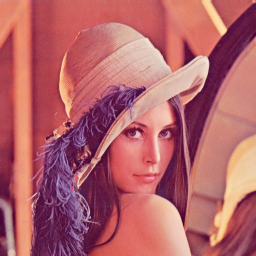

Resized with Linear Interpolation


In [12]:
#Linear
resized_linear = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
cv2_imshow(resized_linear)
print('Resized with Linear Interpolation')

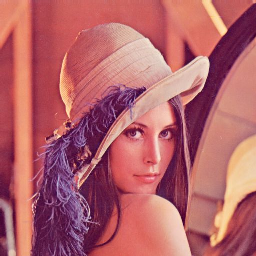

Resized with Nearest Neighbour Interpolation


In [14]:
#Nearest neighbour
resized_nearest = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_NEAREST)
cv2_imshow(resized_nearest)
print('Resized with Nearest Neighbour Interpolation')

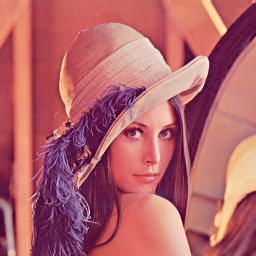

Resized with Polynomial Interpolation


In [15]:
#Polynomial
resized_cubic = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
cv2_imshow(resized_cubic)
print('Resized with Polynomial Interpolation')

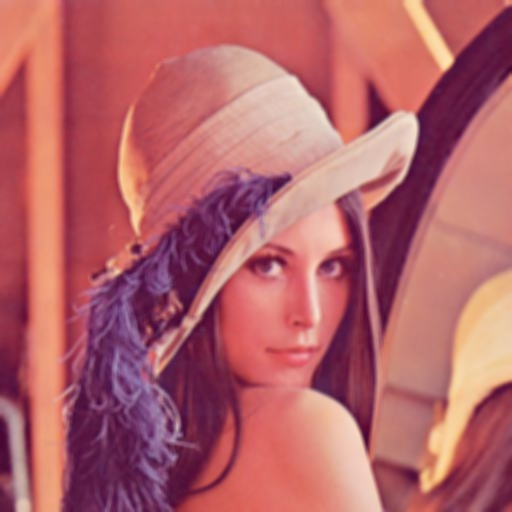

Box Blurring Applied


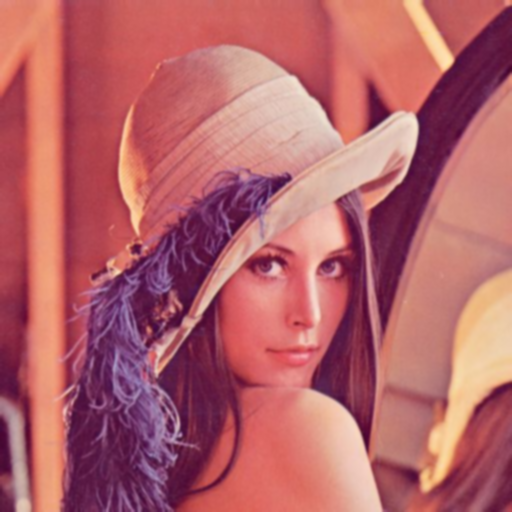

Gaussian Blurring Applied


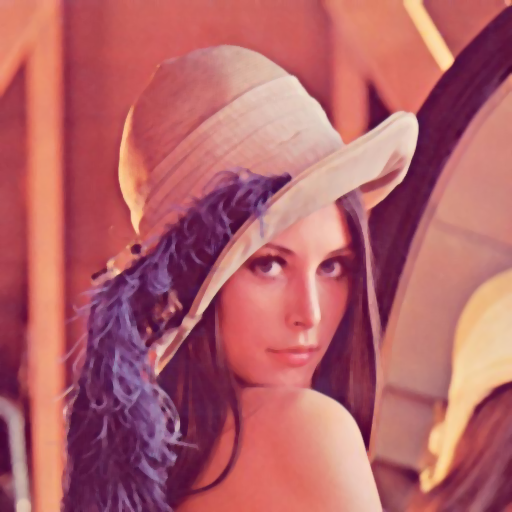

Adaptive Blurring (Median) Applied


In [17]:
#Image Blurring
#Box Blurring
box_blur = cv2.blur(image, (5, 5))
cv2_imshow(box_blur)
print("Box Blurring Applied")

#Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
cv2_imshow(gaussian_blur)
print("Gaussian Blurring Applied")

#Adaptive Blurring
adaptive_blur = cv2.medianBlur(image, 5)
cv2_imshow(adaptive_blur)
print("Adaptive Blurring (Median) Applied")

# **Task 2**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Naive Bayes Cross-Validation Accuracy: 0.56 ± 0.01
Random Forest Cross-Validation Accuracy: 0.96 ± 0.00
Results for Naive Bayes:
Accuracy: 0.56
Precision: 0.69
Recall: 0.56
F-Measure: 0.52
Confusion Matrix:
[[1028    1    9    0    0    2   43    1   68   23]
 [   2 1237    7    8    0    3   12    1   41   11]
 [  73   33  371   86    6    7  290    0  295   13]
 [  58   65   15  466    2    5   55   10  423  120]
 [  26    8   13    6  225    6  104    2  231  555]
 [ 124   31    6   22    5   61   52    3  683  117]
 [   9   18    8    2    1    2 1113    0   23    1]
 [   9   11    3   15   13    2    0  353   44  849]
 [  18  145    6    7    3   10   21    1  721  228]
 [   7    3    4    0    5    1    0    9   19 1146]]

Results for Random Forest:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F-Measure: 0.97
Confusion Matrix:
[[1159    0    1    1    3    2    3    0    4    2]
 [   0 1304    5    7    2    0    1    1    0    2]

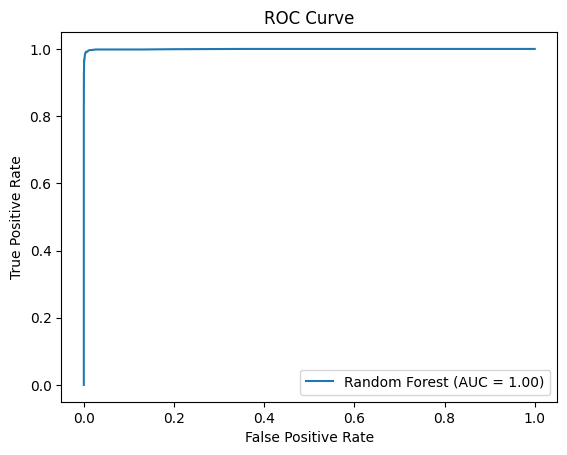

In [18]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X, y), (X_test, y_test) = mnist.load_data(path="mnist.npz")

# Flatten the images for compatibility with classifiers
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize the data to [0, 1] range
X = X / 255.0
X_test = X_test / 255.0

# Train-test split (80-20 split for training and testing)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Naive Bayes Model with Cross Validation
nb_model = GaussianNB()
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cv_scores.mean():.2f} ± {nb_cv_scores.std():.2f}")

# Random Forest Model with Cross Validation
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")

# Train and evaluate the models on validation set (80-20 split) using standard train-test split
# Naive Bayes Model
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

# Random Forest Model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

# Evaluation Metrics for both models
def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F-Measure: {f1_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print()

# Evaluate models
evaluate_model(y_val, y_pred_nb, "Naive Bayes")
evaluate_model(y_val, y_pred_rf, "Random Forest")

# ROC and AUC for Random Forest
y_proba_rf = rf_model.predict_proba(X_val)
roc_auc = roc_auc_score(y_val, y_proba_rf, multi_class="ovr")
print(f"ROC AUC for Random Forest: {roc_auc:.2f}")

# Plot ROC Curve for Random Forest (For class 0)
fpr, tpr, _ = roc_curve(y_val, y_proba_rf[:, 0], pos_label=0)
plt.figure()
plt.plot(fpr, tpr, label="Random Forest (AUC = %.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()